# Stock prices dataset
The data is of tock exchange's stock listings for each trading day of 2010 to 2016.

## Description
A brief description of columns.
- open: The opening market price of the equity symbol on the date
- high: The highest market price of the equity symbol on the date
- low: The lowest recorded market price of the equity symbol on the date
- close: The closing recorded price of the equity symbol on the date
- symbol: Symbol of the listed company
- volume: Total traded volume of the equity symbol on the date
- date: Date of record

In this assignment, we will work on the stock prices dataset named "prices.csv". Task is to create a Neural Network to classify closing price for a stock based on some parameters.

In [1]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## Question 1

### Load the data
- load the csv file and read it using pandas
- file name is prices.csv

In [ ]:
# run this cell to upload file using GUI if you are using google colab

from google.colab import files
files.upload()

In [5]:
# run this cell to to mount the google drive if you are using google colab

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [11]:
project_path = '/content/drive/MyDrive/'

In [12]:
import pandas as pd
df = pd.read_csv(project_path + 'prices.csv')

In [13]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


## Question 2

### Drop null
- Drop null values if any

In [15]:
df = df.dropna()

### Drop columns
- Now, we don't need "date", "volume" and "symbol" column
- drop "date", "volume" and "symbol" column from the data


In [16]:
df = df.drop(['date', 'symbol', 'volume'], axis=1)

## Question 3

### Print the dataframe
- print the modified dataframe

In [17]:
df.head()

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002


In [18]:
df.tail()

,open,close,low,high
851259,103.309998,103.199997,102.849998,103.930000
851260,43.070000,43.040001,42.689999,43.310001
851261,53.639999,53.529999,53.270000,53.740002
851262,44.730000,45.450001,44.410000,45.590000
851263,54.200001,53.630001,53.389999,54.480000


### Get features and label from the dataset in separate variable
- Let's separate labels and features now. We are going to predict the value for "close" column so that will be our label. Our features will be "open", "low", "high"
- Take "open" "low", "high" columns as features
- Take "close" column as label

In [19]:
X = df.drop('close', axis=1)
y = df['close']

In [21]:
X.shape

(851264, 3)

## Question 4

### Create train and test sets
- Split the data into training and testing

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Question 5

### Scaling
- Scale the data (features only)
- Use StandarScaler

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
 X_train_std = scaler.transform(X_train)
 X_test_std = scaler.transform(X_test)

## Question 6

### Convert data to NumPy array
- Convert features and labels to numpy array

In [24]:
import numpy as np


In [27]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [30]:
y_train.shape

(638448,)

In [32]:
X_train_std.shape

(638448, 3)

In [34]:
X_train_std = X_train_std.reshape(X_train_std.shape[0], X_train_std.shape[1], 1)
X_test_std = X_test_std.reshape(X_test_std.shape[0], X_test_std.shape[1], 1)

## Question 7

### Define Model
- Initialize a Sequential model
- Add a Flatten layer
- Add a Dense layer with one neuron as output
  - add 'linear' as activation function


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([ Flatten(), 
                    Dense(1, activation='linear') ])

## Question 8

### Compile the model
- Compile the model
- Use "sgd" optimizer
- for calculating loss, use mean squared error

In [43]:
model.compile(optimizer='sgd', loss='mean_squared_error')

## Question 9

### Fit the model
- epochs: 50
- batch size: 128
- specify validation data

In [45]:
# epoch = no of times the entire data has crossed the forward pass and backward pass
model.fit(X_train_std, y_train, epochs=50, batch_size=128, validation_data=(X_test_std, y_test))

Epoch 1/50
4988/4988 [==============================] - 5s 1ms/step - loss: 0.9520 - val_loss: 0.9633
Epoch 2/50
4988/4988 [==============================] - 5s 969us/step - loss: 0.9439 - val_loss: 0.9537
Epoch 3/50
4988/4988 [==============================] - 5s 989us/step - loss: 0.9371 - val_loss: 0.9494
Epoch 4/50
4988/4988 [==============================] - 5s 971us/step - loss: 0.9312 - val_loss: 0.9389
Epoch 5/50
4988/4988 [==============================] - 5s 975us/step - loss: 0.9242 - val_loss: 0.9345
Epoch 6/50
4988/4988 [==============================] - 5s 972us/step - loss: 0.9171 - val_loss: 0.9553
Epoch 7/50
4988/4988 [==============================] - 5s 968us/step - loss: 0.9109 - val_loss: 0.9214
Epoch 8/50
4988/4988 [==============================] - 5s 985us/step - loss: 0.9048 - val_loss: 0.9120
Epoch 9/50
4988/4988 [==============================] - 5s 987us/step - loss: 0.8983 - val_loss: 0.9068
Epoch 10/50
4988/4988 [==============================] - 5s 959us/

## Question 10

### Evaluate the model
- Evaluate the model on test data

In [46]:
model.evaluate(X_test_std, y_test)

6651/6651 [==============================] - 4s 652us/step - loss: 0.7131


0.7131108641624451

### Manual predictions
- Test the predictions on manual inputs
- We have scaled out training data, so we need to transform our custom inputs using the object of the scaler
- Example of manual input: [123.430000,	122.30999, 116.250000]

In [47]:
model.predict(scaler.transform([[123.430000, 122.30999, 116.250000]]))

array([[119.80609]], dtype=float32)

# Build a DNN

import tensorflow as tf

### Collect Fashion mnist data from tf.keras.datasets 

In [67]:
import tensorflow as tf
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()

In [68]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Pullover


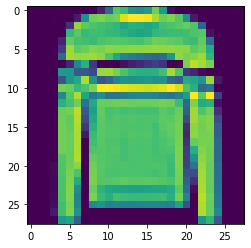

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_x[5].reshape(28,28))
print(class_names[train_y[5]])

In [72]:
train_x.shape

(60000, 28, 28)

In [73]:
u, indices = np.unique(train_y, return_inverse=True)
u

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Change train and test labels into one-hot vectors

In [74]:
train_y[10]

0

In [75]:
train_y = tf.keras.utils.to_categorical(train_y, num_classes=10)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=10)

In [76]:
train_y[10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [66]:
28*28

784

### Build the Graph

### Initialize model, reshape & normalize data

In [80]:
model1 = tf.keras.models.Sequential()
# initialize input layer
model1.add(tf.keras.layers.Reshape((784,), input_shape=(28,28,)))
model1.add(tf.keras.layers.BatchNormalization())

### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [81]:
# Hidden layers
model1.add(tf.keras.layers.Dense(200, activation='relu'))
model1.add(tf.keras.layers.Dense(100, activation='relu'))

#Dropout layer - to get rid of the noise 
# 25% of the neurons will be deactivated in the last hidden layer so that model learns on signal and not the noise
model1.add(tf.keras.layers.Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [82]:
model1.add(tf.keras.layers.Dense(10, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.fit(train_x, train_y, batch_size=32, epochs=15, validation_data=(test_x, test_y))

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5142 - accuracy: 0.8154 - val_loss: 0.4050 - val_accuracy: 0.8526
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3960 - accuracy: 0.8555 - val_loss: 0.3821 - val_accuracy: 0.8583
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3608 - accuracy: 0.8670 - val_loss: 0.3944 - val_accuracy: 0.8567
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3360 - accuracy: 0.8754 - val_loss: 0.3702 - val_accuracy: 0.8717
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3165 - accuracy: 0.8824 - val_loss: 0.3682 - val_accuracy: 0.8737
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3014 - accuracy: 0.8887 - val_loss: 0.3469 - val_accuracy: 0.8799
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2873 - accuracy: 0.8934 - val_loss: 0.3655 - val_accuracy:

In [84]:
model1.evaluate(test_x, test_y)

313/313 [==============================] - 0s 1ms/step - loss: 0.3703 - accuracy: 0.8850


[0.3703123927116394, 0.8849999904632568]